# ADP 27회 실기

문제 및 풀이과정 참조 사이트
- https://www.datamanim.com/dataset/ADPpb/00/27.html
- https://amaruak00.github.io/2022/12/17/adp27th.html

## 머신러닝 파트
## 1번 데이터 확인 및 전처리

In [1]:
# pip intall seaborn
# pip install matplotlib
# pip install scikit-learn
# pip install -U imbalanced-learn
# pip install statsmodels

In [2]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


### 1-1. EDA 데이터 탐색 시각화

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')

display(df.describe())
print('\n\n')
print( ' ' 
    , '데이터 컬럼 정보'
    , df.info()
    , '====== 결측치 체크 ========'
    , df.isna().sum()
    , '\n=====종속변수 불균형 확인 ======='
    , df[['Class']].value_counts()
    , '\n=====종속변수 불균형 비율 ======='
    , (df[['Class']].value_counts() / df[['Class']].shape[0] * 100)
    , ' '
    , sep = '\n'
     )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB
 
데이터 컬럼 정보
None
======

- 데이터 전체 컬럼은 float 및 int 형이다
- 결측치 데이터는 존재하지 않는다.
- 종속변수의 수가 83:17 정도로 불균형하게 이루어져 있다.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993,993
1,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount
Class,,,,,,,,,,,,,,,,,,
0,0.018917,-0.011237,-0.045308,0.044207,0.086018,-0.045132,0.009048,-0.014774,-0.032517,0.005167,0.038878,0.003587,0.023074,0.024501,0.017683,0.043565,0.035805,85.187613
1,-4.597659,3.299139,-6.624207,4.420185,-2.867841,-1.469696,-5.130353,0.938431,-2.501269,-5.419653,3.722054,-6.067424,-0.043141,-7.090834,0.026921,-3.971442,-6.564245,107.246700


Text(0.5, 0.98, 'Count')

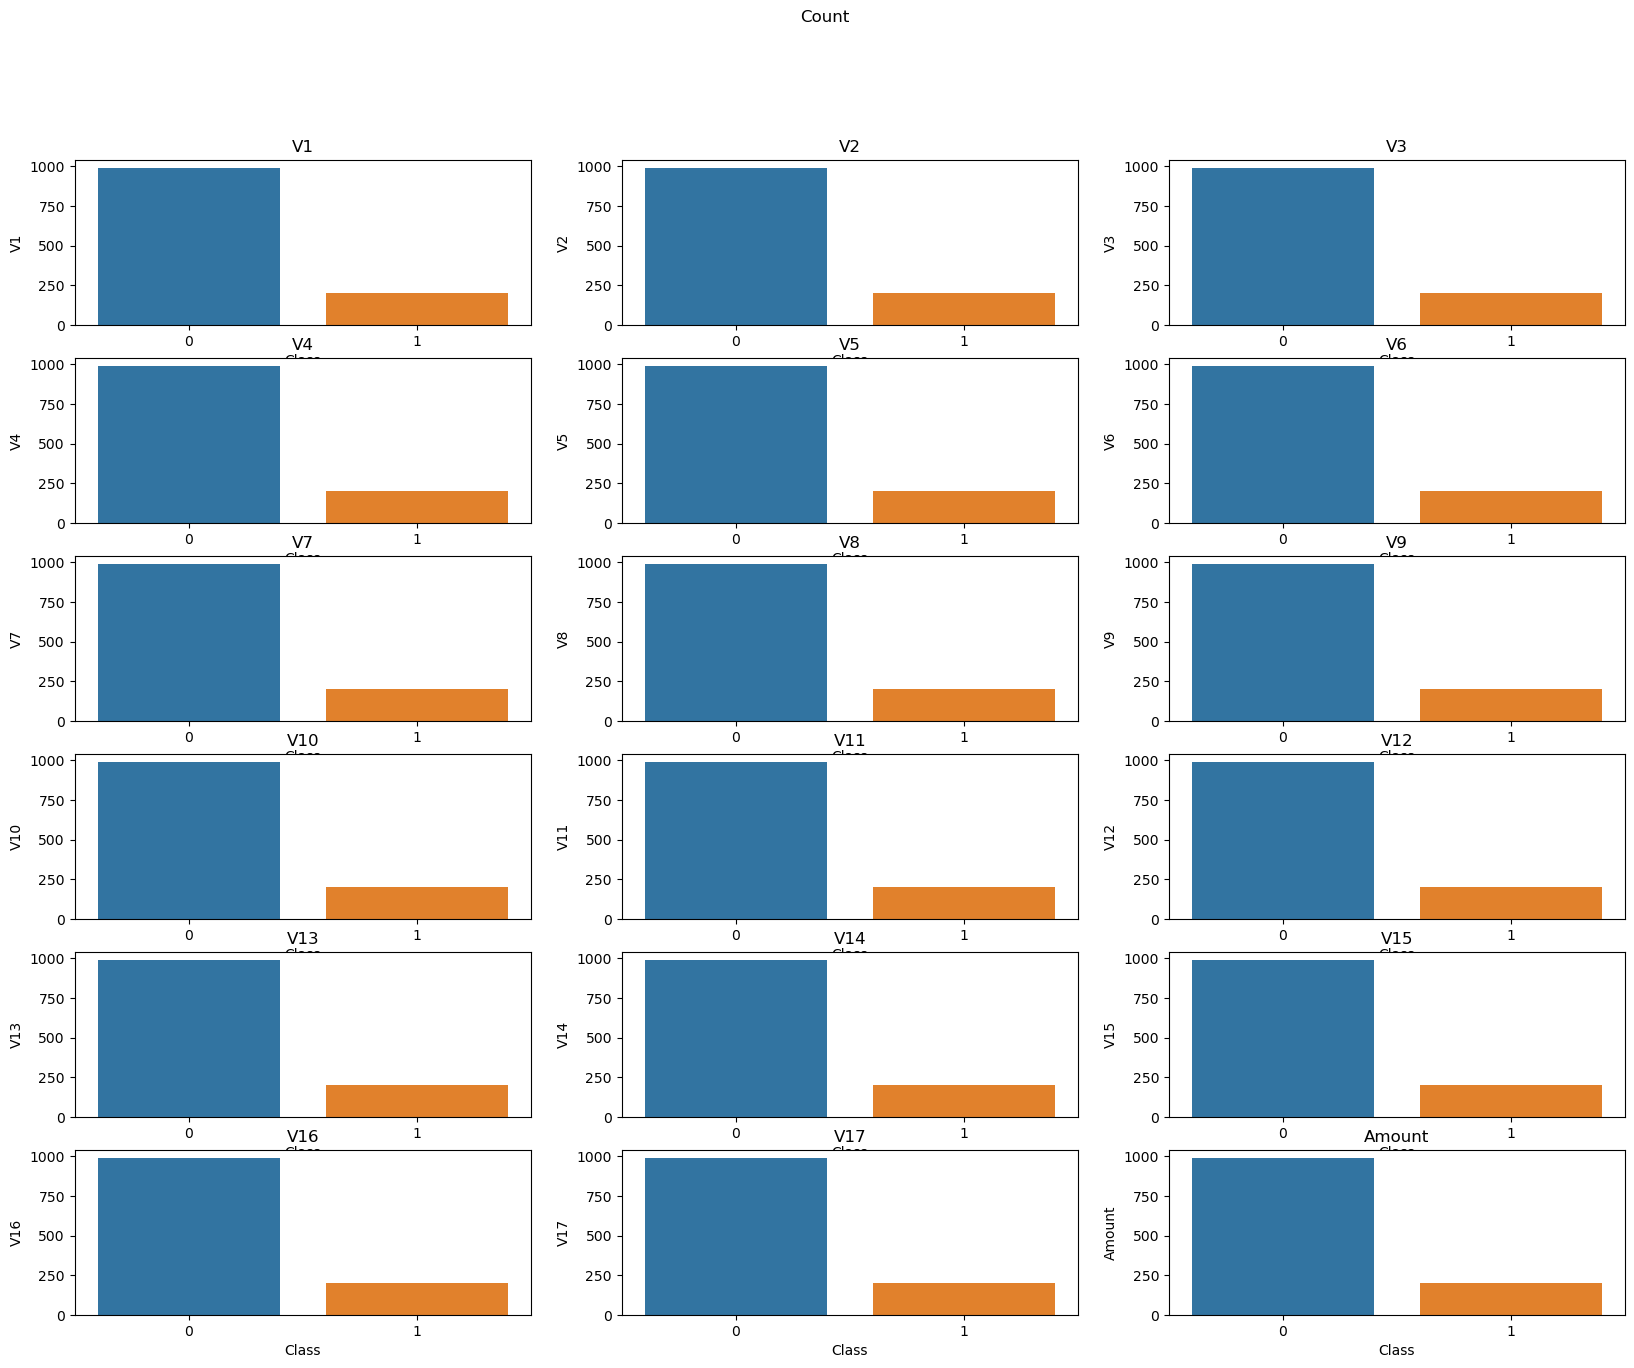

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

# 이상 거래 유무에 따른 그룹화 후 평균값 및 건수 산출
class_grp_count = df.drop('Time', axis=1).groupby('Class').count()
class_grp_mean = df.drop('Time', axis=1).groupby('Class').mean()
display(class_grp_count)
display(class_grp_mean)

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20, 15))
for idx in range(len(class_grp_count.columns)) : 
    import math
    r = math.trunc(idx / 3)
    c = idx % 3
    sns.barplot(x=class_grp_count.index, y=class_grp_count.columns[idx], data=class_grp_count.iloc[: , idx].to_frame(), ax=ax[r][c])
    ax[r][c].set_title(class_grp_count.columns[idx])
plt.suptitle('Count') 

Text(0.5, 0.98, 'Mean')

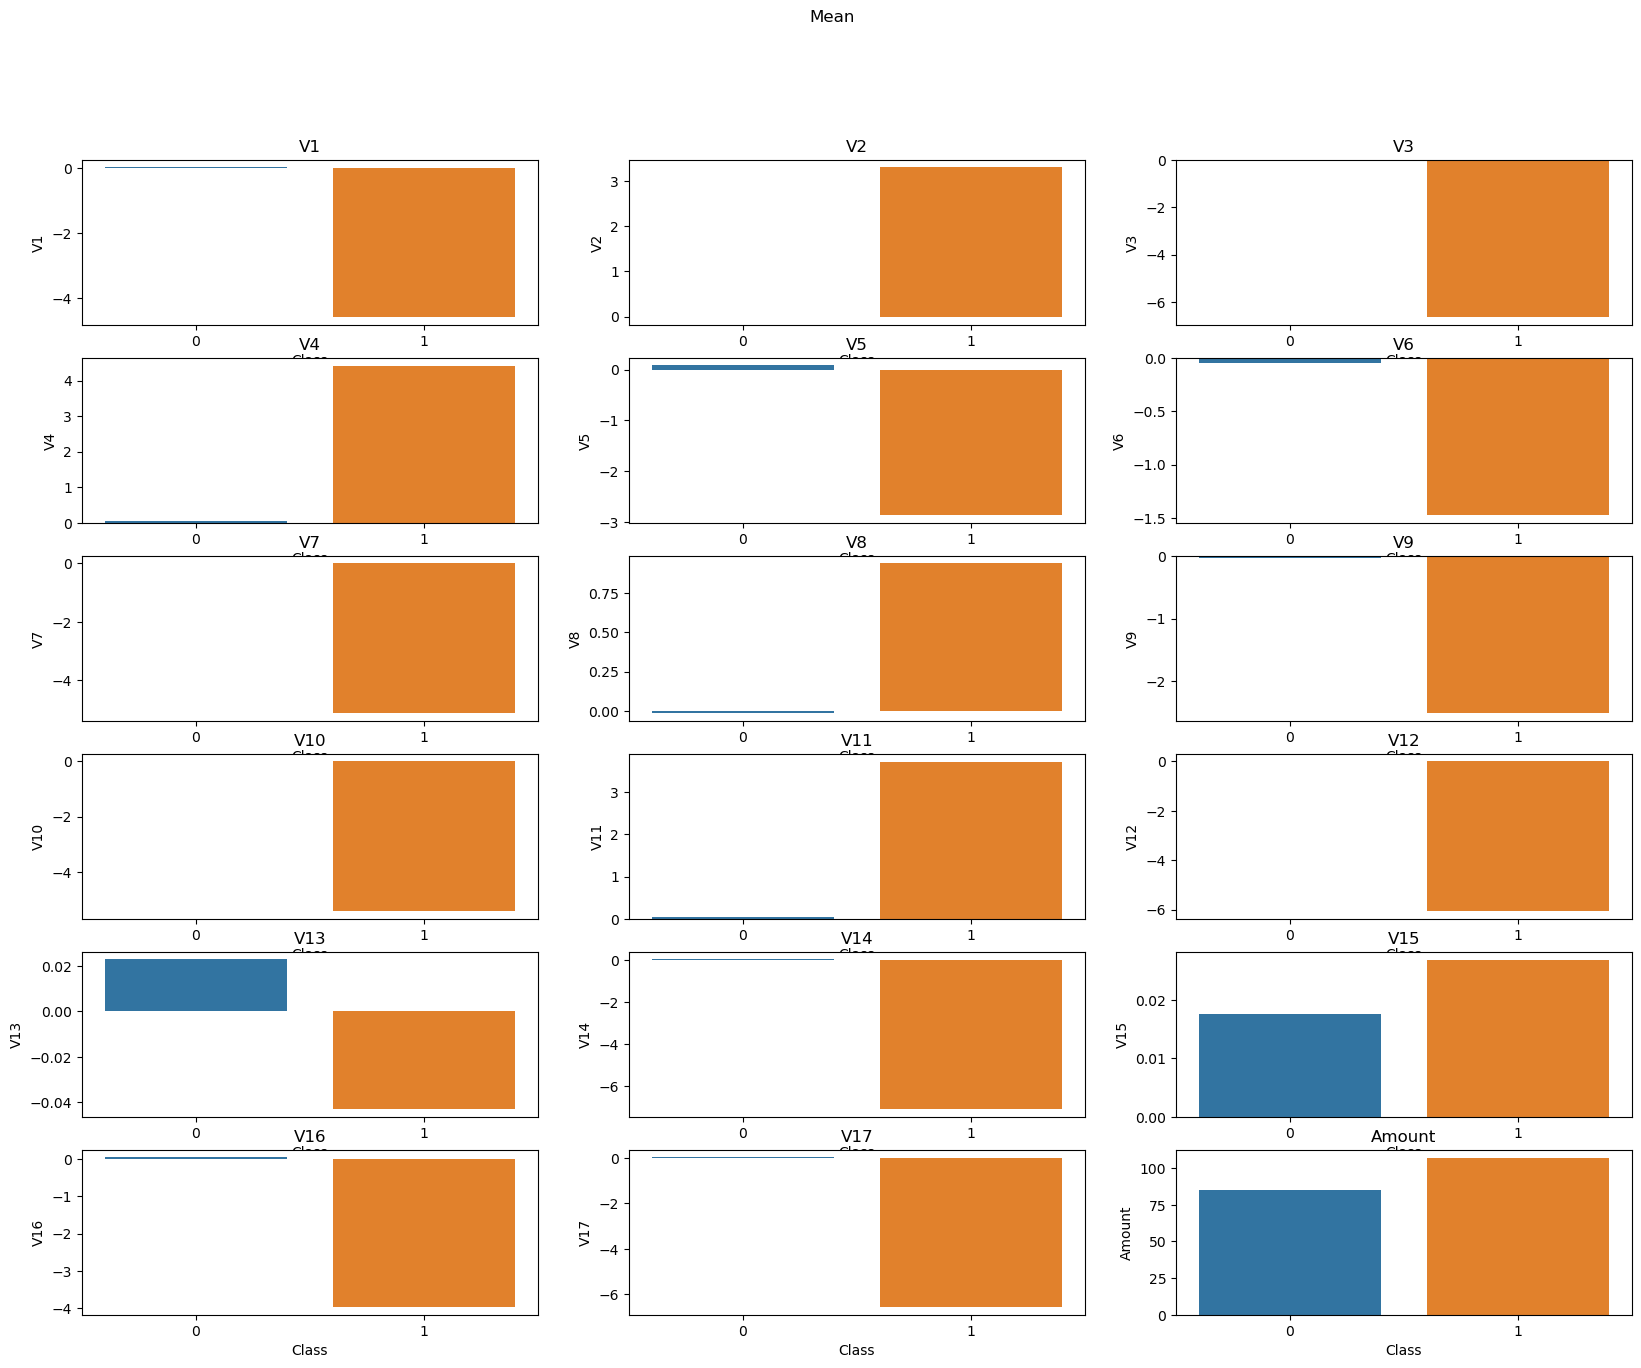

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20, 15))
for idx in range(len(class_grp_mean.columns)) : 
    import math
    r = math.trunc(idx / 3)
    c = idx % 3
    sns.barplot(x=class_grp_mean.index, y=class_grp_mean.columns[idx], data=class_grp_mean.iloc[: , idx].to_frame(), ax=ax[r][c])
    ax[r][c].set_title(class_grp_mean.columns[idx])
plt.suptitle('Mean')

- 종속변수의 정상/이상 거래에 대한 독립변수들의 건수는 정상거래(0)가 더 많다
- 하지만 평균값은 이상거래(1)에 해당하는 값이 더 큰 것을 확인하였다.
- 특히 금액(Amount)은 거래건수는 이상거래의 수가 적지만, 평균값이 정상거래 보다 더 커 이상거래에 큰 금액이 분포한다고 유추 가능

### 1-2 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

<AxesSubplot:>

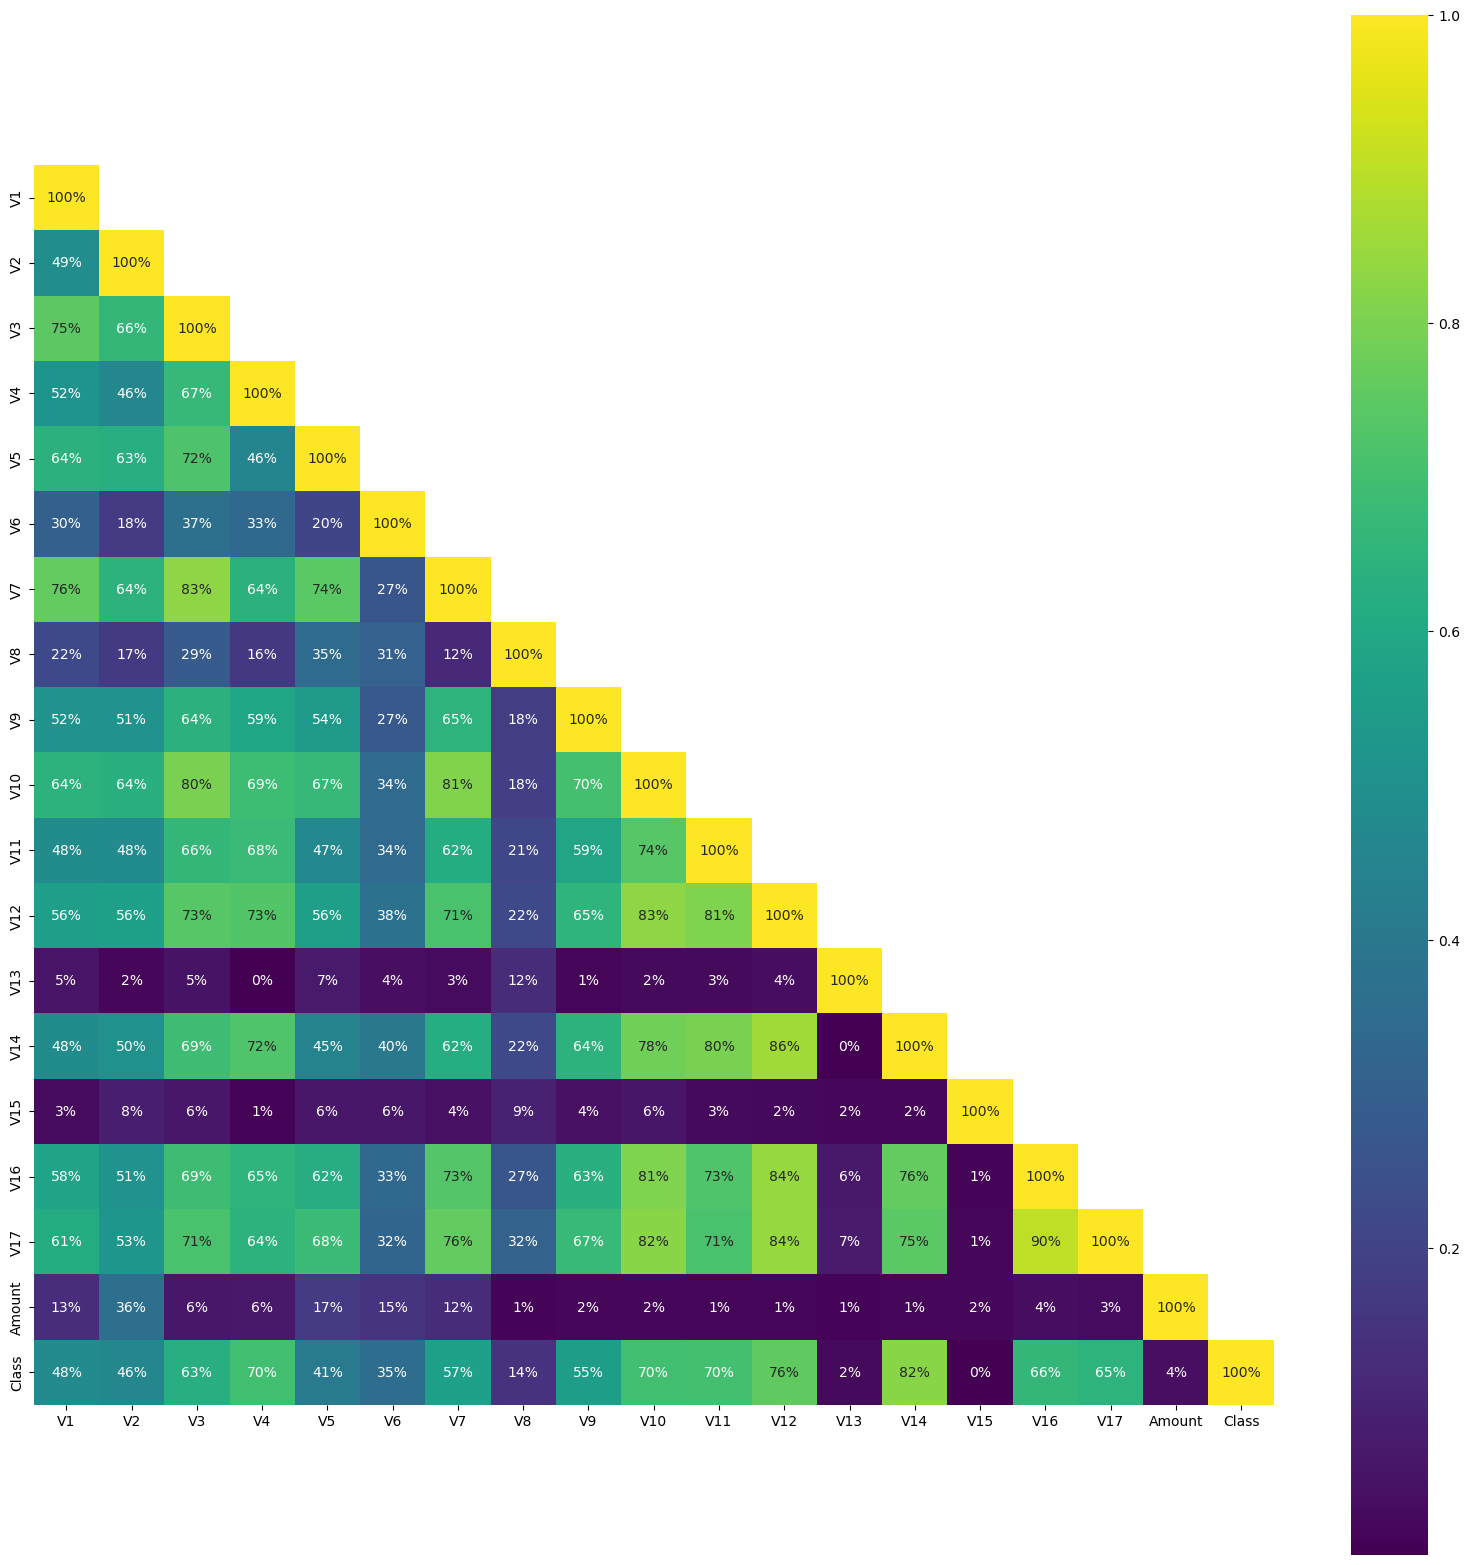

In [6]:
plt.figure(figsize=(20,20))

# corr matrix 생성
corr_matrix = df.drop(['Time'], axis=1).corr().abs()
# 상 삼각행렬 생성
up_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)

# 상관계수가 0.8 보다 큰 특성 열의 인덱스 찾기
# to_drop = [column for column in up_mask.columns if any(up_mask[column] >= 0.8)]
sns.heatmap(corr_matrix, mask=up_mask, annot=True, fmt='.0%', square=True, cmap='viridis')

In [7]:
# corr 값이 큰 상위 피처 출력 
corr_unstack = corr_matrix.unstack()
df_cor = pd.DataFrame(corr_unstack[corr_unstack < 1].sort_values(ascending=False), columns=['corr'])[:23]
display(df_cor.style.background_gradient(cmap='viridis'))

# 상위 피처 컬럼명
top_corr_cols = df_cor.reset_index()['level_0'].unique()
print('top_corr_cols:', top_corr_cols)

,,corr
V17,V16,0.902381
V16,V17,0.902381
V14,V12,0.855828
V12,V14,0.855828
V16,V12,0.843644
V12,V16,0.843644
V17,V12,0.840627
V12,V17,0.840627
V3,V7,0.830995
V7,V3,0.830995


top_corr_cols: ['V17' 'V16' 'V14' 'V12' 'V3' 'V7' 'V10' 'Class' 'V11']


- 변수별 상관관계 확인을 위한 Heatmap 그래프 확인
- 변수별 상관관계가 높은 컬럼은 아래와 같다.
    - V17, V16, V12, V14, V3, V7

- 많은 변수가 상관관계가 높아 다중공선성 문제가 있기에, 차원축소 등의 작업을 통한 차원축소 작업이 필요하다.

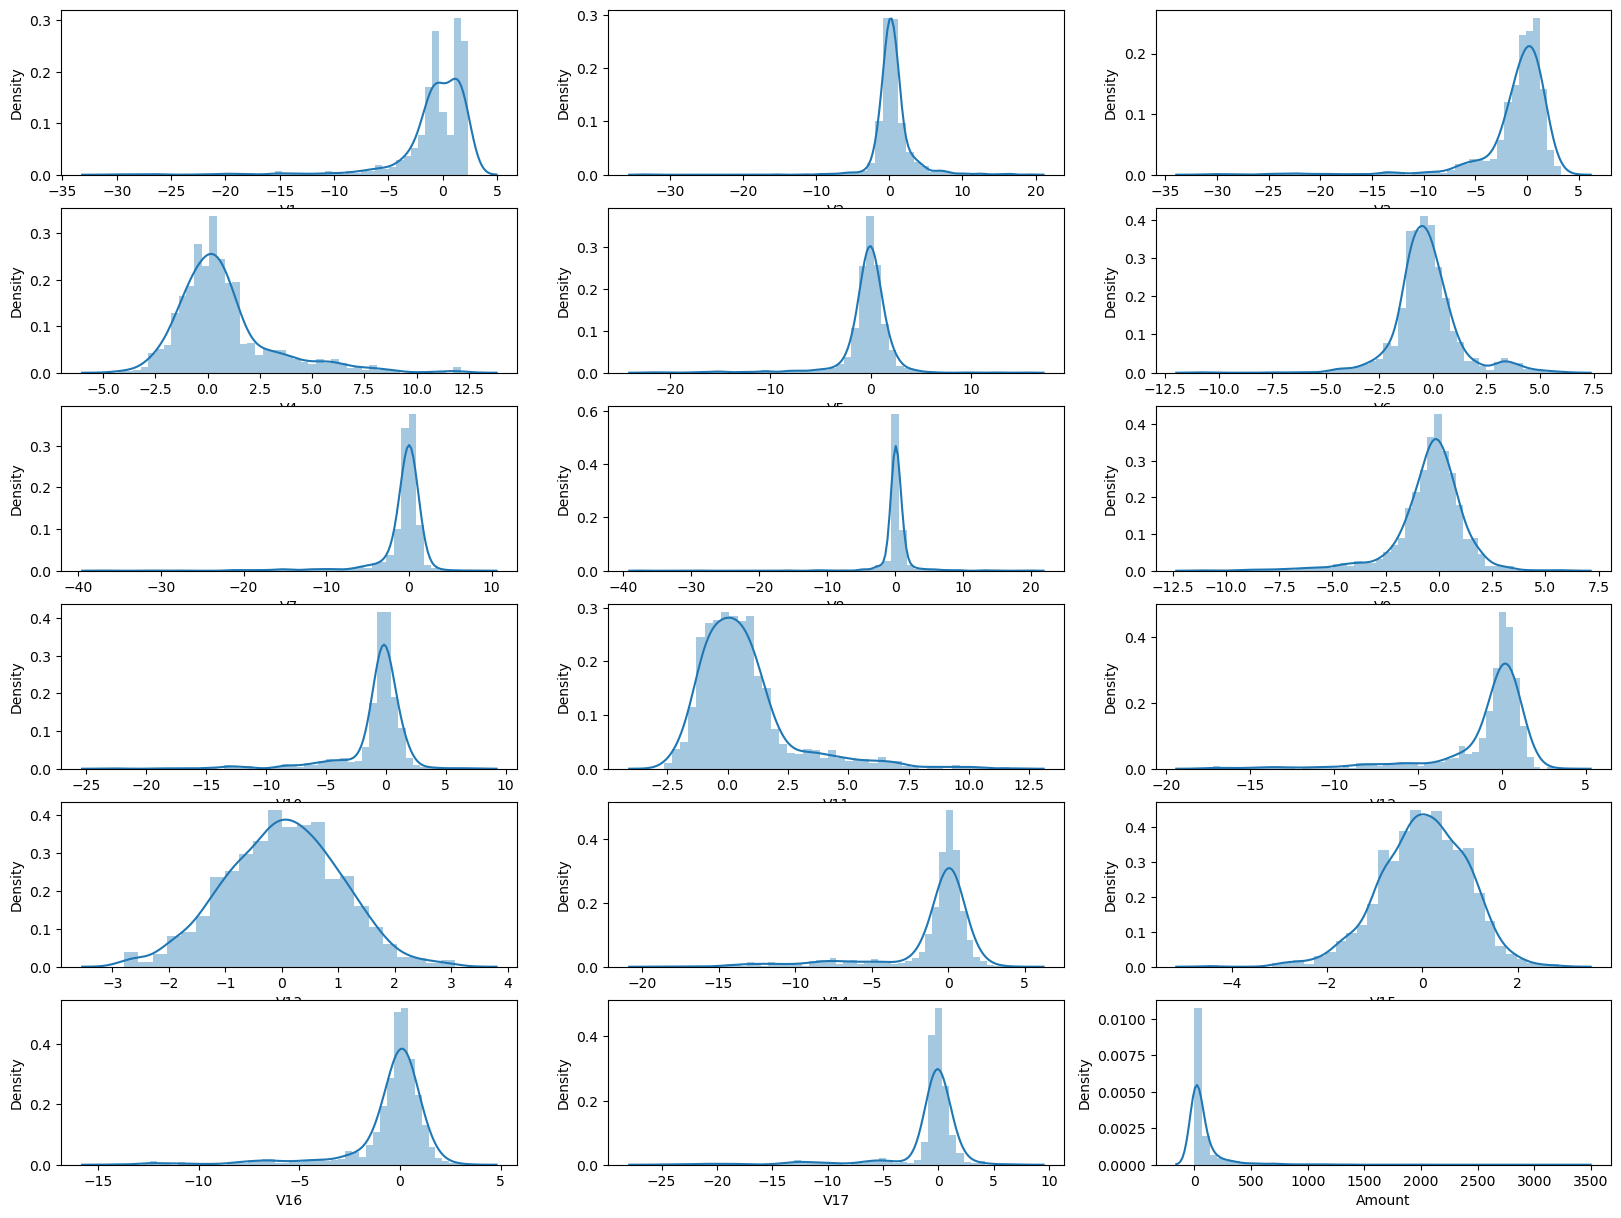

In [8]:
col_names = df.columns[1:-1]

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(20, 15))
for idx in range(len(col_names)) : 
    import math
    r = math.trunc(idx / 3)
    c = idx % 3
    min_val = df[col_names[idx]].min()
    max_val = df[col_names[idx]].max()
    term_val = math.trunc((max_val - min_val) / 10)
#     print('i:', idx, ', name:', col_names[idx], r, c)
    sns.distplot(df[col_names[idx]], ax=ax[r, c])
#     sns.jointplot(df, x=name, y='Class')

- 금액(Amount) 컬럼은 대부분의 값이 500 이하에 분포되어 있다.
- 독립변수 Amount는 거래에 많은 영향을 끼칠 변수로 생각되는데, 데이터가 한쪽으로 몰려 있어 정규화가 필요해 보인다.

## 2번 차원축소 (1번 이어서)
### 2-1 차원축소 방법 2가지 이상 비교하고 한 가지 선택

차원축소 방법은 아래와 같은 방법이 있다.
1. PCA (주성분분석) : 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소
    - 선형적인 데이터에 올바른 차원축소
    - 데이터에서 분산이 최대힌 성분 축에 관심이 있음
    - 장점
        - 기존 데이터의 정보 유실이 최소화
        - 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명 가능
2. KernelPCA (커널PCA) : 주성분 분석의 확장을 사용하여 비선형 차원 축소
    - 비선형 데이터에 대한 차원축소 방법
3. LDA (선형판별분석) : 클래스를 최대한 분리하는 성분 축으로 특성을 투영
    - 특성 공간을 저차원으로 투영한다는 점에서 주성분분석(PCA)와 비슷함
    - 클래스 간의 차이를 최대화하는 추가적인 목적을 가짐
4. TSVD : 희소한 특성 행렬의 차원을 축소시 유익함
    - PCA와 비슷하나, PCA와 달리 희소 특성 행렬에 사용 가능

### 2-2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

In [9]:
# 데이터 손실이 가장 적고 널리 사용되는 PCA를 이용하여 차원축소 수행
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']
X.head()

# 상관관계가 높았던 피처
top_corr_cols
# cols_name = ['V17', 'V16', 'V12', 'V14', 'V3', 'V7'] 

# StandardScaler 적용 # np.log1p(Amount) 해야한다. 
scaler = StandardScaler()
# df_scaled = scaler.fit_transform(X[top_corr_cols])
df_scaled = scaler.fit_transform(X)
# ndarray 인 df_scaled를 다시 DF로 변환
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)

pca3 = PCA(n_components=10)
# pca.fit(df_scaled)
df_pca3 = pca3.fit_transform(df_scaled)
print('PCA Component별 분산 비율:', pca3.explained_variance_ratio_)
print('PCA Component별 분산:', pca3.explained_variance_)
df_pca3 = pd.DataFrame(df_pca3)#, columns=['pca1', 'pca2', 'pca3'])
display(df_pca3.head())

PCA Component별 분산 비율: [0.51361612 0.07117263 0.06966029 0.06400925 0.05314122 0.04897359
 0.03882312 0.02556334 0.02437357 0.0205256 ]
PCA Component별 분산: [9.25284609 1.28218215 1.25493719 1.15313311 0.95734448 0.88226414
 0.69940233 0.46052618 0.43909234 0.36977066]


,0,1,2,3,4,5,6,7,8,9
0,-0.997076,-0.207832,-0.610750,-0.394244,0.900161,0.212324,0.302236,0.109713,-0.124567,-0.365226
1,2.461293,-0.731143,-0.515611,-1.010191,0.148879,-0.311254,-0.065655,0.933591,-0.441115,0.342995
2,-1.358729,-0.122716,2.538037,0.037120,0.007321,1.221959,0.173704,-0.393710,0.579051,0.126220
3,-0.855668,1.903671,-1.886663,-1.051973,0.555639,1.137678,1.433891,0.693638,-0.051970,0.235401
4,-1.395062,0.079289,0.019840,-0.098769,1.303101,2.309902,-1.522836,0.639306,0.100875,1.269287


In [10]:
def scree_plot(pca) :
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.plot(pca.explained_variance_ratio_, 'o-', color='blue')
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, color='red')

    ax.set_xlabel("Principal Component")
    ax.set_ylabel('Variance Explained')
    plt.title('scree plot')
    plt.show()


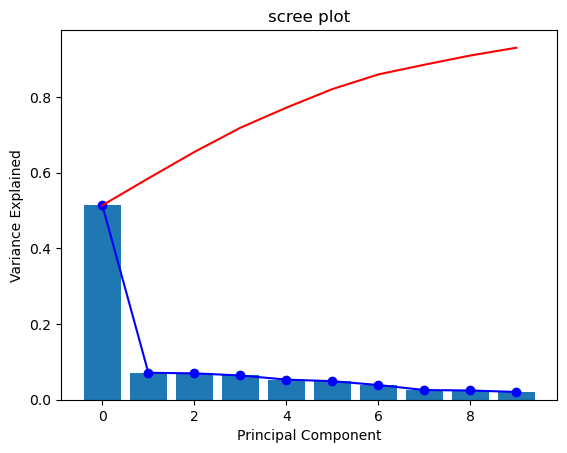

In [11]:
scree_plot(pca3)

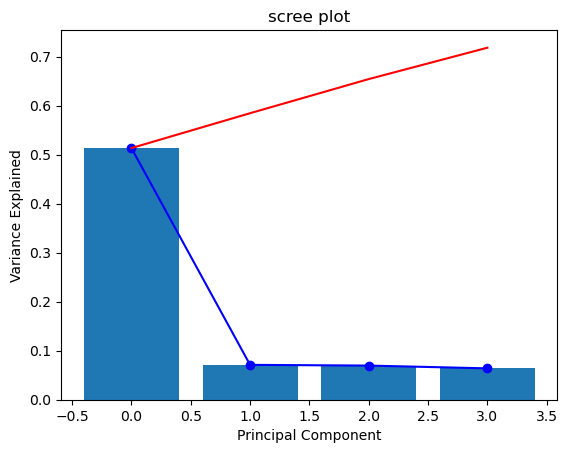

In [12]:
pca4 = PCA(n_components=4)
pca4.fit(df_scaled)
scree_plot(pca4)

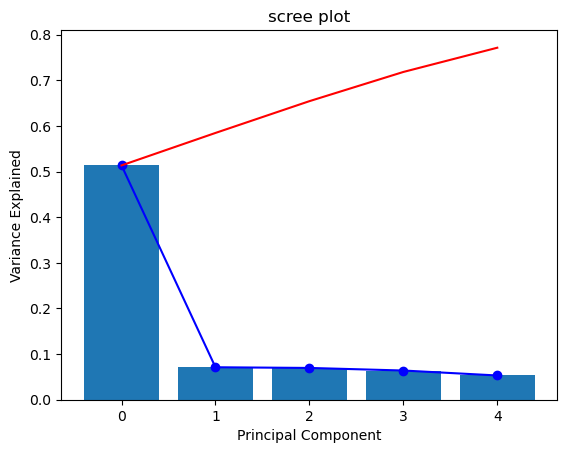

In [13]:
pca5 = PCA(n_components=5)
pca5.fit(df_scaled)
scree_plot(pca5)

- 차원축소 결과를 scree_plot으로 확인한 결과 적절한 컴포넌트 수는 엘보우 그래프에 의한 2개가 가장 적절한 것 같다

## 3 오버샘플링 / 언더샘플링 (1번 이어서)
### 3-1 오버샘플링과 언더샘플링의 장단점 비교 및 선택 구현

- 언더샘플링 장점
    - 다수의 클래스 데이터를 제거하므로 계산시간이 감소한다.
    - 클래스 오버랩을 감소시킨다.
- 언더샘플링 단점
    - 데이터를 제거하기 때문에 정보 손실이 발생한다.
    - 많은 정상 레이블 데이터 감소로 인한 제대로 된 학습을 수행할 수 없다.
- 언더샘플링 종류
    - Random Undersampling :다수 클래스에 속해 있는 관측치들 중 무작위로 샘플링하는 기법. 수행 마다 다른 결과 도출
    - Tomek Links : 서로 다른 클래스의 두 점을 연결한 후 토멕링크에 해당하는 데이터 쌍들 중 다수 클래스의 데이터를 삭제
    - CNN (Condensed Nearest Neighbor) : KNN 적용 시 k값은 반드시 1이어야 함
    - OSS (One-Side Selection) : Tomek Links 와 CNN을 같이 수행하는 방식

---

- 오버샘플링 장점
    - 데이터 정보 손실이 없다
    - 언더샘플링에 비해 높은 분류 정확도를 보인다.
    - 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터 확보가 가능
- 오버샘플링 단점
    - 과적합 문제가 발생한다.
    - 데이터 증가로 인해 계산시간이 증가한다.
    - 노이즈 또는 이상치에 민감한 편이다.
- 오버샘플링 종류
    - Random Oversampling : 소수 클래스 데이터 중 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식
        - 장점 : 데이터 불균형 문제 해결, 구현이 간단함
        - 단점 : 종속변수에 대한 고려없어 중복 생성, overfitting의 가능성이 존재. 테스트 세트 과적합 및 성능저하
    - SMOTE : 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 
              사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
        - 장점 : 데이터 불균형 문제 해결, 데이터 분포를 고려한 중복없는 데이터 생성
        - 단점 : 고차원 데이터에는 문제가 발생할 수 있다.
    - ADASYN (Adaptive Synthetic Sampling Approach) : 샘플링 개수를 데이터 위치에 따라 다르게 설정한다. SMOTE와 유사하지만
         학습하기 어려운 샘플, 즉 결정경계에 더 가까운 샘플에 대해 더 많은 합성 샘플을 생성함
        - 장점 : 보더라인에 오버샘플링을 집중하고, 다수 클래스 주변의 소수 클래스에 집중하여 오버샘플링
        - 단점 : 계산 비용이 많이 들 수 있음.

### 3-2 구현 및 알고리즘 2가지 이상 비교, 성능 측정

In [14]:
import imblearn.over_sampling 

In [15]:
def model_oversampling(model, ftr_train, lbl_train) :
    x_train_sample, y_train_sample = model.fit_resample(ftr_train, lbl_train)
    print('=======', model.__class__, '=====')
    print('샘플링 적용 전 피처/레이블 데이터 세트:', ftr_train.shape, lbl_train.shape)
    print('샘플링 적용 후 피처/레이블 데이터 세트:', x_train_sample.shape, y_train_sample.shape)
    print('샘플링 적용 후 레이블 값 분포 :\n', y_train_sample.value_counts())
    return x_train_sample, y_train_sample

In [16]:
from sklearn.model_selection import train_test_split

# amount를 scaling
amount_n = np.log1p(df['Amount'])
# df.drop(['Amount_scaled'], axis=1, inplace=True)
# df_scaled.insert(0, 'Amount_scaled', amount_n)
df_scaled['Amount'] = amount_n

x = df_scaled.copy()
y = df['Class']



x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)

from imblearn.over_sampling import RandomOverSampler, SMOTE

random_over = RandomOverSampler(random_state=1)
smote = SMOTE(random_state=1)
x_train_random, y_train_random = model_oversampling(random_over, x_train, y_train)
x_train_smote, y_train_smote = model_oversampling(smote, x_train, y_train)


======= <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'> =====
샘플링 적용 전 피처/레이블 데이터 세트: (835, 18) (835,)
샘플링 적용 후 피처/레이블 데이터 세트: (1390, 18) (1390,)
샘플링 적용 후 레이블 값 분포 :
 0    695
1    695
Name: Class, dtype: int64
======= <class 'imblearn.over_sampling._smote.base.SMOTE'> =====
샘플링 적용 전 피처/레이블 데이터 세트: (835, 18) (835,)
샘플링 적용 후 피처/레이블 데이터 세트: (1390, 18) (1390,)
샘플링 적용 후 레이블 값 분포 :
 0    695
1    695
Name: Class, dtype: int64


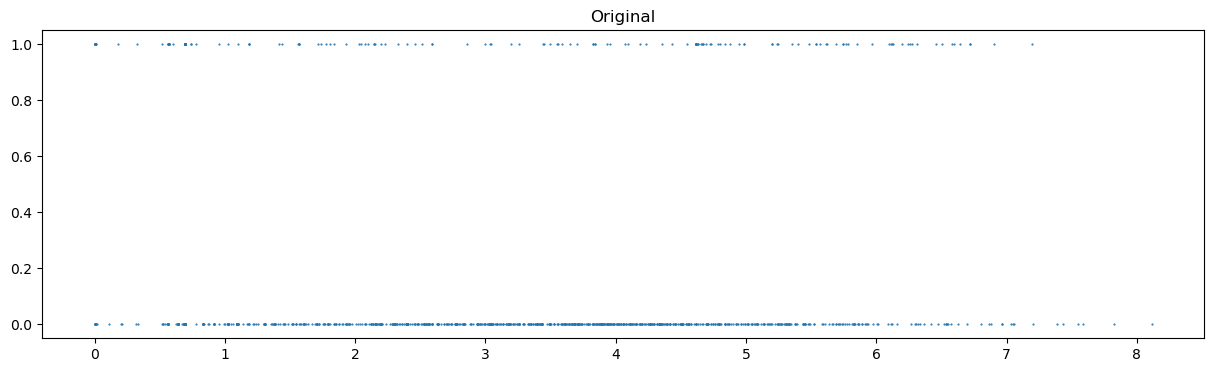

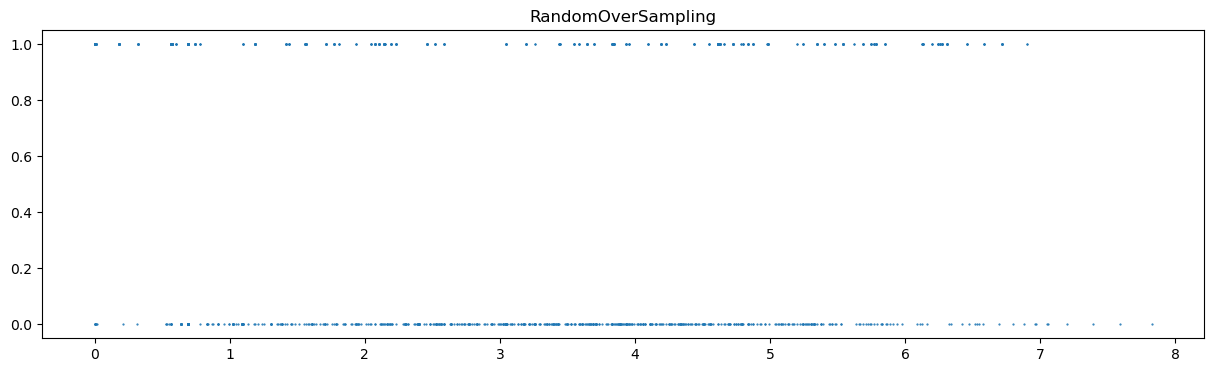

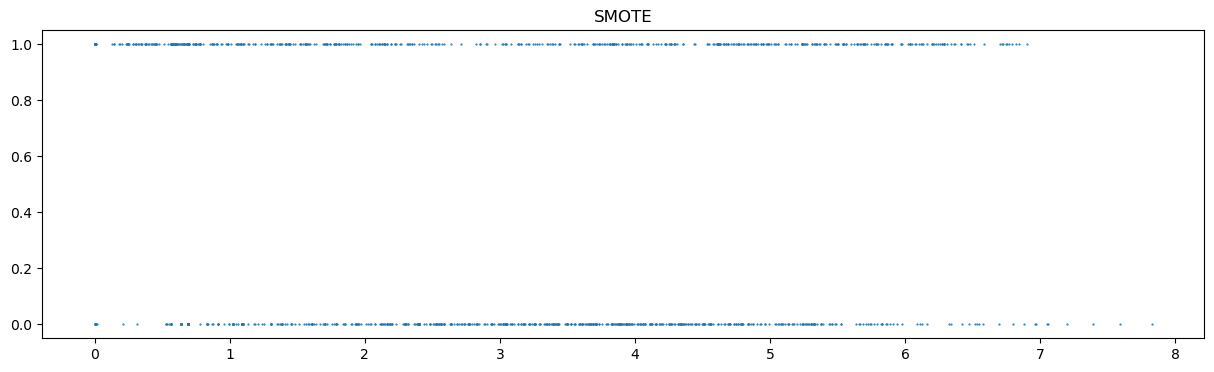

In [17]:
df_random = pd.concat([x_train_random, y_train_random], axis=1)
df_smote = pd.concat([x_train_smote, y_train_smote], axis=1)

plt.figure(figsize=(15,4))
plt.title('Original')
plt.scatter(df_scaled['Amount'], df['Class'], s=0.3)
plt.show()

plt.figure(figsize=(15,4))
plt.title('RandomOverSampling')
plt.scatter(df_random['Amount'], df_random['Class'], s=0.3)
plt.show()

plt.figure(figsize=(15,4))
plt.title('SMOTE')
plt.scatter(df_smote['Amount'], df_smote['Class'], s=0.3)
plt.show()

- 오버샘플링 결과 원본에 비해 이상 거래의 수가 증가하였음
- RandomOversampling 대비 SMOTE에서 더 다양한 차원의 샘플이 생성된 것을 볼 수 있다.

### 3-3 현재까지 전처리한 데이터를 통해 모델 수행 후 결과 분석

In [18]:
# IF의 predict는 이상치를 -1, 정상값을 1로 반환해서
# y와 동일하게 정상값 0, 이상값 1로 변경
def label_mapping(x) :
    if x == 1 :
        return 0
    elif x== -1 :
        return 1
    else :
        return x

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

def evaluate_model(model, train_x, train_y, test_x, test_y):
    
    x_train_copy = train_x.copy()
    y_train_copy = train_y.copy()
    x_test_copy = test_x.copy()
    y_test_copy = test_y.copy()
    
    start = time.time()
    model.fit(x_train_copy, y_train_copy)
    end = time.time() - start
    
    pred = model.predict(x_test_copy)
    
    from sklearn.ensemble import IsolationForest
    if isinstance(model, IsolationForest) :
        pred = np.array(list(map(label_mapping, pred)))

    # calculate metrics
    accuracy_test = accuracy_score(y_test_copy, pred)
    precision_test= precision_score(y_test_copy, pred)
    recall_test = recall_score(y_test_copy, pred)
    f1_test = f1_score(y_test_copy, pred)
    auc_test = roc_auc_score(y_test_copy, pred)
    
    # print results
#     print("Accuracy:", accuracy_test)
#     print("Precision:", precision_test)
#     print("Recall:", recall_test)
#     print("F1-score:", f1_test)
#     print("AUC Score:", auc_test)
#     print('time:', end)
    rt_tuple = np.array([accuracy_test, precision_test, recall_test, \
                f1_test, auc_test, end])
    rt_arr = np.array(rt_tuple).reshape(1, -1)
#     rt_arr = rt_tuple
    return pd.DataFrame(rt_arr, columns=['accuracy', 'precision', 'recall' \
                                        , 'f1', 'auc', 'time'])

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, y_pred_prob) :
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (AUC=%0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Charateristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(random_state=1)
rf = RandomForestClassifier(random_state=1)

# LR 
df_lr_org = evaluate_model(lr, x_train, y_train, x_test, y_test)
df_lr_random = evaluate_model(lr, x_train_random, y_train_random, x_test, y_test)
df_lr_smote = evaluate_model(lr, x_train_smote, y_train_smote, x_test, y_test)
# RF
df_rf_org = evaluate_model(rf, x_train, y_train, x_test, y_test)
df_rf_random = evaluate_model(rf, x_train_random, y_train_random, x_test, y_test)
df_rf_smote = evaluate_model(rf, x_train_smote, y_train_smote, x_test, y_test)

df_result = pd.concat([df_lr_org, df_rf_org, df_lr_random, df_rf_random, df_lr_smote, df_rf_smote], axis=0)
df_result.index=['LR_ORG', 'RF_ORG', 'LR_random', 'RF_random', 'LR_smote', 'RF_smote']
display(df_result)

,accuracy,precision,recall,f1,auc,time
LR_ORG,0.974860,1.000000,0.850000,0.918919,0.925000,0.028944
RF_ORG,0.972067,1.000000,0.833333,0.909091,0.916667,0.391526
LR_random,0.972067,0.931034,0.900000,0.915254,0.943289,0.036062
RF_random,0.974860,0.981132,0.866667,0.920354,0.931655,0.363063
LR_smote,0.972067,0.931034,0.900000,0.915254,0.943289,0.035635
RF_smote,0.977654,0.981481,0.883333,0.929825,0.939989,0.401137


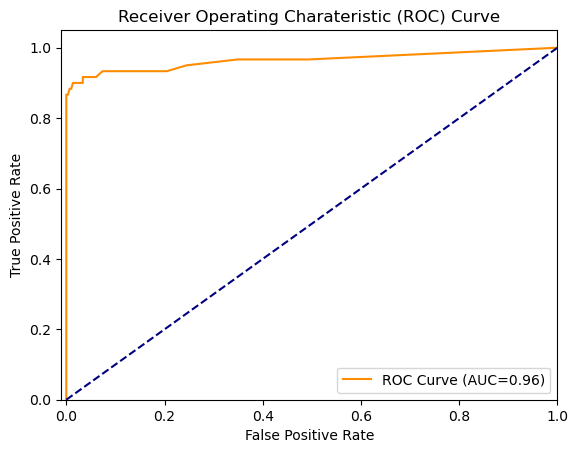

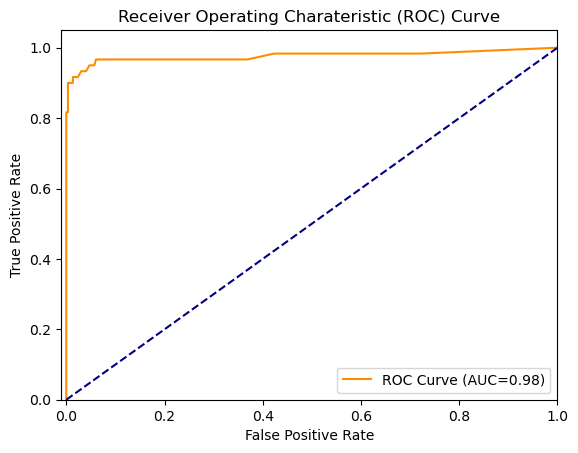

In [22]:
rf.fit(x_train, y_train)
y_pred_prob = rf.predict_proba(x_test)[:, 1]
plot_roc(y_test, y_pred_prob)

rf.fit(x_train_smote, y_train_smote)
y_pred_prob = rf.predict_proba(x_test)[:, 1]
plot_roc(y_test, y_pred_prob)

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, rf.predict(x_test)))

tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(x_test)).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')


[[297   1]
 [  7  53]]
TN:297, FP:1, FN:7, TP:53


- 모델학습 시간은 LogisticRegression에 비해 RandomForest 가 평균적으로 더 오래 걸린다.
- 그러나 정확도를 비롯한 AUC 점수까지 모두 RandomForest 가 더 높게 나온다.
- RandomSampling 에 비해 SMOTE를 통해 더 높은 점수를 산출할 수 있다. 

## 4 이상탐지 (1번 이어서)
### 4-1 이상탐지 모델 2가지 이상 기술, 장/단점 설명

1. Isolation Forest
- 설명 : 기능과 분할 값을 무작위로 선택하여 데이터를 더 작은 하위 집합으로 분할하는 트리기반 모델. 그 후 관찰을 얼마나 빨리 격리할수 있는지에 따라 이상 점수를 할당함
- 장점
    - 고차원 데이터 세트에서 잘 작동
    - 빠르고 효율적
    - 데이터 분포에 대한 사전 지식이나 가정이 필요하지 않음
- 단점
    - 데이터가 고도로 구조화된 경우에는 효과적이지 않음
    - 다중 모달 데이터로 어려움을 겪을 수 있음
    
2. LOF(Local Outlier Factor)
- 설명 : 각 관측치의 로컬 밀도를 계산하고 이를 이웃 항목과 비교하여 이상값을 식별하는 밀도 기반 모델
- 장점
    - 고차원 데이터에서 이상값을 식별하는 데 효과적
    - 복잡한 구조의 데이터 세트에서 잘 작동
    - 글로벌 및 로컬 이상값을 모두 처리할 수 있음
- 단점
    - 이웃 수와 사용된 거리 메트릭에 민감함
    - 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음
    - 편향된 분포를 가진 데이터 세트에서 잘못된 긍정을 생성할 수 있음
3. One-class SVM
- 설명 : 데이터를 원점과 분리하기 위해 데이터를 더 높은 차원의 공간에 매핑하는 커널 기반 모델임. 그런 다음 이상값을 결정 경계에서 가장 멀리 떨어진 관측값으로 식별
- 장점
    - 고차원 데이터에서 이상값을 식별하는데 효과적
    - 비선형 구조의 데이터 세트에서 잘 작동
    - 글로벌 및 로컬 이상값을 모두 처리할 수 있음
- 단점
    - 효과적으로 작동하려면 하이퍼파라미터 조정이 필요할 수 있음
    - 커널 공간에서 데이터를 분리할 수 없는 경우 성능이 좋지 않을 수 있음
    - 대규모 데이터 세트에서는 계산 비용이 많이 들 수 있음

### 4-2 `2번`에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, `3번`에서 만든 모델과 비교

In [24]:
from sklearn.ensemble import IsolationForest

x_train_pca, x_test_pca, y_train_pca, y_test_pca = \
    train_test_split(df_pca3, y, stratify=y, test_size=0.3, random_state=1)

# contamination : 이상값 비율 (auto (0.05) 또는 float )
isf = IsolationForest(n_estimators=100, n_jobs=-1, max_samples='auto', contamination=0.17)
isf.fit(x_train_pca, y_train_pca)
y_prob_pca = isf.predict(x_test_pca)
y_prob_pca_map = np.array(list(map(label_mapping, y_prob_pca)))

df_pca_isf = evaluate_model(isf, x_train_pca, y_train_pca, x_test_pca, y_test_pca)
df_pca_isf.index=['PCA_ISF']
df_result_1 = pd.concat([df_result, df_pca_isf], axis=0)
display(df_result_1)


,accuracy,precision,recall,f1,auc,time
LR_ORG,0.974860,1.000000,0.850000,0.918919,0.925000,0.028944
RF_ORG,0.972067,1.000000,0.833333,0.909091,0.916667,0.391526
LR_random,0.972067,0.931034,0.900000,0.915254,0.943289,0.036062
RF_random,0.974860,0.981132,0.866667,0.920354,0.931655,0.363063
LR_smote,0.972067,0.931034,0.900000,0.915254,0.943289,0.035635
RF_smote,0.977654,0.981481,0.883333,0.929825,0.939989,0.401137
PCA_ISF,0.868715,0.597015,0.666667,0.629921,0.788031,0.378068


- 정확도, 정밀도, 재현율, F1 스코어 등 모든 점수가 PCA에 비해 SMOTE 가 더 좋게 나왓다.

In [25]:
print('Confusion Matrix PCA ISF')
print(confusion_matrix(y_test_pca, y_prob_pca_map))
tn, fp, fn, tp = confusion_matrix(y_test_pca, y_prob_pca_map).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')
print()
print('Confusion Matrix SMOTE')
rf.fit(x_train_smote, y_train_smote)
print(confusion_matrix(y_test, rf.predict(x_test)))
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(x_test)).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')

Confusion Matrix PCA ISF
[[267  31]
 [ 20  40]]
TN:267, FP:31, FN:20, TP:40

Confusion Matrix SMOTE
[[297   1]
 [  7  53]]
TN:297, FP:1, FN:7, TP:53


### 4-3 데이터 분석가 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

- 3번 SMOTE를 통한 분류 모델의 결과가 정확도, 정밀도 등의 모든 평가 점수가 이상탐지 모델에 비해 높게 나왔다
- 또한 이상거래와 정상거래를 반대로 오탐하는 False Positive, False Negative 점수 또한 SMOTE 모델이 더 좋게 나왔다
- 시간이 중요하면 로지스틱분류를 사용하고, 정확도가 더 중요하면 RandomForest 모델을 사용하면 좋을듯 하다.

## 통계파트
## 5번
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [26]:
p2 = 100_000
p1 = 150_000
p0 = 250_000

rt1 = (p1/p2)
rt2 = (p0/p1)
geo_mean=np.sqrt(rt1 * rt2) - 1
print('기하평균:', round(geo_mean * 100, 2), '%')
print('CAGR : ', round(((p0/p2)**(1/2)-1)*100, 2), '%')

기하평균: 58.11 %
CAGR :  58.11 %


## 6번
12건의 광고시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [27]:
# 정규분포를 가정하며, 집계한 광고수가 30개 미만이므로
# t검정을 사용한다.
from scipy import stats
mu = 15.5
var = 3.2
n = 20 # 임의의 수 입력
print('신뢰구간:', stats.t.interval(alpha=0.9, loc=15.5, scale=np.sqrt(var/n), df=(n-1)))

신뢰구간: (14.808346875391452, 16.191653124608546)


## 7번
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 7.1 귀무가설과 대립가설을 세우시오

- 7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [28]:
import pandas as pd

df_river = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df_river.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


### 7-1 귀무가설과 대립가설을 세우시오
- 귀무가설 : 상-하류간 어류다양성 점수는 상관 없다
- 대립가설 : 상-하류간 어류다양성 점수는 상관이 없지 않다.

### 7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [29]:
# t 검정을 사용
# 상/하류간 독립이 아니라고 했으므로
# 독립표본 검정이 아닌 대응표본 검정을 실시함

# 상/하류의 데이터에 대한 정규성 검정을수행
# 표본수가 적으니 비모수 검정?
# shapiro의 귀무가설은 정규분포를 따른다.
# p값이 0.05 보다 크면 귀무가설 따름
print('정규성검정 상류:', stats.shapiro(df_river['up']))
print('정규성검정 하류:', stats.shapiro(df_river['down']))
print('샘플 데이터는 p값이 둘 다 0.05를 초과하여 정규성을 만족함.')
print('실제 시험에선 하나가 정규성을 만족하지 못함')

# 둘 중 하나가 정규성을 만족하지 못해
# stats.ttest_rel을 쓰지 못하고, 윌콕슨 부호검정 수행
print(stats.wilcoxon(df_river['up'], df_river['down']))
print('실제 데이터에선 부호검정 결과 p값이 0.05 미만으로 나와 귀무가설을 기각')
print('즉, 상-하류간 어류 다양성 점수에 유의미한 차이가 있다.')

정규성검정 상류: ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447697877883911)
정규성검정 하류: ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)
샘플 데이터는 p값이 둘 다 0.05를 초과하여 정규성을 만족함.
실제 시험에선 하나가 정규성을 만족하지 못함
WilcoxonResult(statistic=64.5, pvalue=0.24125289916992188)
실제 데이터에선 부호검정 결과 p값이 0.05 미만으로 나와 귀무가설을 기각
즉, 상-하류간 어류 다양성 점수에 유의미한 차이가 있다.


### 8번
user_counts를 종속변수로 하는 데이터이다

- 8.1 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

- 8.2 `8.1`의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [30]:
import pandas as pd
import numpy as np

df_user= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df_user.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


### 8-1 분위수회귀를 사용하여 백분위 50%로 잡고 회귀 계수를 구하시오.
(반올림하여 소수점 둘째자리 까지 표기하시오)

In [31]:
import statsmodels.formula.api as smf
display(df_user.head(3))

formula = 'user_counts ~ temperature + wind + precipitation'
model = smf.quantreg(formula, df_user)
result = model.fit(q=0.5) # 백분위 50%
print('\n\n')
display(result.summary())

names = result.params[1:].index
values = result.params[1:].values

print('\n\n답안 : 각 회귀 계수. 소수점 2자리 반올림')
for name, val in zip(names, values) :
    print(name, ':', round(val, 2))

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Wed, 08 Mar 2023   No. Observations:                 2097
Time:                        11:38:50   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""



답안 : 각 회귀 계수. 소수점 2자리 반올림
temperature : 268.89
wind : -129.41
precipitation : -83.38


### 8-2 
`8-1` 모델의 회귀계수를 활용하여 temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 `user_counts`를 예측하시오

In [32]:
df_sample = pd.DataFrame(data={'temperature':[10.5], 'wind': [8.2], 'precipitation': [3.5]})
y_predict = result.predict(df_sample)
print('user_counts:', y_predict.values)

user_counts: [7412.23953725]


### 9번
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

- 9.1 귀무가설과 대립가설 설정하라

- 9.2 통계량을 구하고, 대립가설 채택여부를 기술하라

In [33]:
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
display(df_subway.head(3))

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305


In [34]:
# 9-1 귀무가설과 대립가설 설정하라
print('귀무가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없다.')
print('대립가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없지 않다.')

귀무가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없다.
대립가설: 지하철 호선과 월별, 승객 수 간에는 상관관계가 없지 않다.


In [35]:
# 9-2 통계량을 구하고, 대립가설 채택여부를 기술하라
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'total ~ line * month'
model = ols(formula, df_subway).fit()

display(model.summary())
print('\n\n')
print(anova_lm(model, typ=3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1437
Date:                Wed, 08 Mar 2023   Prob (F-statistic):              0.933
Time:                        11:38:51   Log-Likelihood:                -475.01
No. Observations:                  72   AIC:                             958.0
Df Residuals:                      68   BIC:                             967.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1379.3788    121.348     11.367      0.000    1137.233    1621.524
line          24.8561     56.173      0.442      0.660     -87.236     136.948
month          5.3840     16.488      0.327      0.745     -27.517      38.285
line:month    -1.6862      7.632     -0.221      0.826     -16.916      13.544
==============================================================================
Omnibus:                       25.188   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.887
Skew:                           0.749   Prob(JB):                      0.00432
Kurtosis:                       1.824   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""




                  sum_sq    df           F        PR(>F)
Intercept   4.305506e+06   1.0  129.212253  2.239995e-17
line        6.524219e+03   1.0    0.195798  6.595386e-01
month       3.553077e+03   1.0    0.106631  7.450156e-01
line:month  1.626329e+03   1.0    0.048808  8.258132e-01
Residual    2.265841e+06  68.0         NaN           NaN
